In [21]:
#### OSCILADOR ARMÓNICO AMORTIGUADO FORZADO ####

%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import scipy as scipy
from math import *

# Condiciones iniciales

x_0 = 10 # Posición inicial (arb)
v_0 = -10 # Velocidad inicial (arb)

# Definiciones iniciales

w_0 = 1 # Frecuencia natural x>0
W_0 = 10 # Frecuencia natural x<0
amort = 0.00 # constante de amortiguamiento
f_0 = 0 # Amplitud de la fuerza por unidad de masa
w = 0 # Frecuencia fuerza externa


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
def f(t,x_0,v_0):

    x,v = np.zeros(np.size(t)),np.zeros(np.size(t))
    x[0],v[0] = x_0,v_0
    aux = 0

    for i in range(np.size(t)-1):

        if x[i] > 0 or (x[i] == 0 and v[i] > 0):
            W = w_0
        else:
            W = W_0

        A = f_0/np.sqrt(((W**2-w**2)**2+(2*amort*w)**2))
        if W != w:
            d = np.arctan(2*amort*w/(W**2-w**2))
        else:
            d = pi/2
        r = np.sqrt(W**2-amort**2)
        c1 = x_0-A*np.cos(d)
        c2 = (v_0+amort*c1-w*A*np.sin(d))/r

        x[i+1] = np.exp(-amort*t[i+1])*(c1*np.cos(t[i+1]*r)+c2*np.sin(t[i+1]*r))+A*np.cos(w*t[i+1]-d)
        v[i+1] = np.exp(-amort*t[i+1])*(np.cos(t[i+1]*r)*(-amort*c1+r*c2)+np.sin(t[i+1]*r)*(-r*c1-amort*c2))-w*A*np.sin(w*t[i+1]-d)
        print(W)
        #if x[i+1] < 0:
        #    aux = i+1
        #    break
    '''
    for i in range(aux,np.size(t)-1):
        
        if x[i] > 0 or (x[i] == 0 and v[i] > 0):
            W = w_0
        else:
            W = W_0
    
        A = f_0/np.sqrt(((W**2-w**2)**2+(2*amort*w)**2))
        if W != w:
            d = np.arctan(2*amort*w/(W**2-w**2))
        else:
            d = pi/2
        r = np.sqrt(W**2-amort**2)
        c2 = (np.exp(-amort*t[i])*(v[i]+w*A*np.sin(w*t[i]-d))-amort*np.exp(-amort*t[i])*A*np.cos(w*t[i]-d)-r*np.exp(-amort*t[i])*A*np.cos(w*t[i]-d)*np.tan(t[i]*r))/(amort*np.sin(t[i]*r)+r*np.cos(t[i]*r)+r*np.sin(t[i]*r)*np.tan(t[i]*r)-amort*np.sin(t[i]*r))
        c1 = (-np.exp(-amort*t[i])*A*np.cos(w*t[i]-d)-c2*np.sin(t[i]*r))/np.cos(t[i]*r)

        x[i+1] = np.exp(-amort*t[i+1])*(c1*np.cos(t[i+1]*r)+c2*np.sin(t[i+1]*r))+A*np.cos(w*t[i+1]-d)
        v[i+1] = np.exp(-amort*t[i+1])*(np.cos(t[i+1]*r)*(-amort*c1+r*c2)+np.sin(t[i+1]*r)*(-r*c1-amort*c2))-w*A*np.sin(w*t[i+1]-d)
        print(W)
    '''
    return [x,v]

h = 0.01 # Paso de tiempo
tf = 50 # Variables independientes escogidas
t0 = 0
t = np.linspace(t0,tf,int((tf-t0)/h))

sol = f(t,x_0,v_0)
x = sol[0]
v = sol[1]


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
1
10
1
10
1
10
1
10
1
10
1
10
1
10
1
10
1
10
1
10
1
10
1
10
1
10
1
10
1
10
1
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
1
10
1
10
1
10
1
10
1
10
1
10
1
10
1
10
1
10
1
10
1
10
1
10
1
10
1
10
1
10
1
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
1
10
1
10
1
10
1
10
1
10
1
10
1
10
1
10
1
10
1
10
1
10
1
10
1
10
1
10
1
10
1
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
1
10
1
10
1
10
1
10
1
10
1
10
1
10
1
10
1
10
1
10
1
10
1
10
1
10
1
10
1
10
1
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
1
10
1
10
1
10
1
10
1
10
1
10
1
10
1
10
1
10
1
10
1
10
1
10


In [23]:
def W(x): # frecuecia angular
    return W_0 - (W_0-w_0)*np.heaviside(x,w_0)

In [24]:
'''
def EDO(t,y):
    x,v = y
    return [v,-2*amort*v-W(x)**2*x+f_0*np.cos(w*t)]

h = 0.01 # Paso de tiempo
tf = 100 # Variables independientes escogidas
t0 = 0
t = np.linspace(t0,tf,int((tf-t0)/h))
T = 2*pi/w
n = int(tf/T) # Número de puntos del diagrama de Poincaré

y0 = np.array([x_0,v_0]) # Establecemos las condiciones iniciales
sol = scipy.integrate.solve_ivp(EDO, (t0,tf), y0, method='RK45',t_eval = t)
x,v = sol.y

ind = np.array([np.searchsorted(t,T*(i+1)+0.9) for i in range(n-1)]) # Calculamos los puntos del diagrama de Poincaré
xp = x[ind]
vp = v[ind]

'''

"\ndef EDO(t,y):\n    x,v = y\n    return [v,-2*amort*v-W(x)**2*x+f_0*np.cos(w*t)]\n\nh = 0.01 # Paso de tiempo\ntf = 100 # Variables independientes escogidas\nt0 = 0\nt = np.linspace(t0,tf,int((tf-t0)/h))\nT = 2*pi/w\nn = int(tf/T) # Número de puntos del diagrama de Poincaré\n\ny0 = np.array([x_0,v_0]) # Establecemos las condiciones iniciales\nsol = scipy.integrate.solve_ivp(EDO, (t0,tf), y0, method='RK45',t_eval = t)\nx,v = sol.y\n\nind = np.array([np.searchsorted(t,T*(i+1)+0.9) for i in range(n-1)]) # Calculamos los puntos del diagrama de Poincaré\nxp = x[ind]\nvp = v[ind]\n\n"

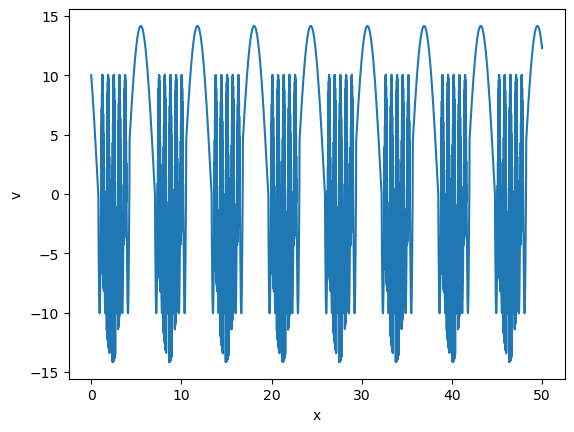

In [25]:
# Representaciones gráficas
            
# plt.plot(x1a[range(40000,50000)],y1a[range(40000,50000),0])
# plt.plot(x,v,linewidth='0.5',alpha=1)
# plt.plot(xp,vp,'.',color='red',markersize='1',alpha=0.7)
plt.plot(t,x)
plt.xlabel('x')
plt.ylabel('v')
plt.title('')
plt.show()